In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [8]:
# 1. Generate a 2D binary classification dataset
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=123)

# 2. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=123)

In [9]:
# 4. Define a simple neural network model in Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 5. Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 6. Train the model and capture training history
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.2)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5515 - loss: 0.6854 - val_accuracy: 0.7000 - val_loss: 0.6599
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7065 - loss: 0.6311 - val_accuracy: 0.8125 - val_loss: 0.6135
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8346 - loss: 0.5883 - val_accuracy: 0.8250 - val_loss: 0.5721
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8641 - loss: 0.5499 - val_accuracy: 0.8625 - val_loss: 0.5356
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8962 - loss: 0.4989 - val_accuracy: 0.8750 - val_loss: 0.5025
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9106 - loss: 0.4624 - val_accuracy: 0.8750 - val_loss: 0.4727
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8878 - loss: 0.4430 - val_accuracy: 0.8750 - val_loss: 0.4454
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8788 - loss: 0.4153 - val_accuracy: 0.8750 - val_loss: 0.4204
Ep

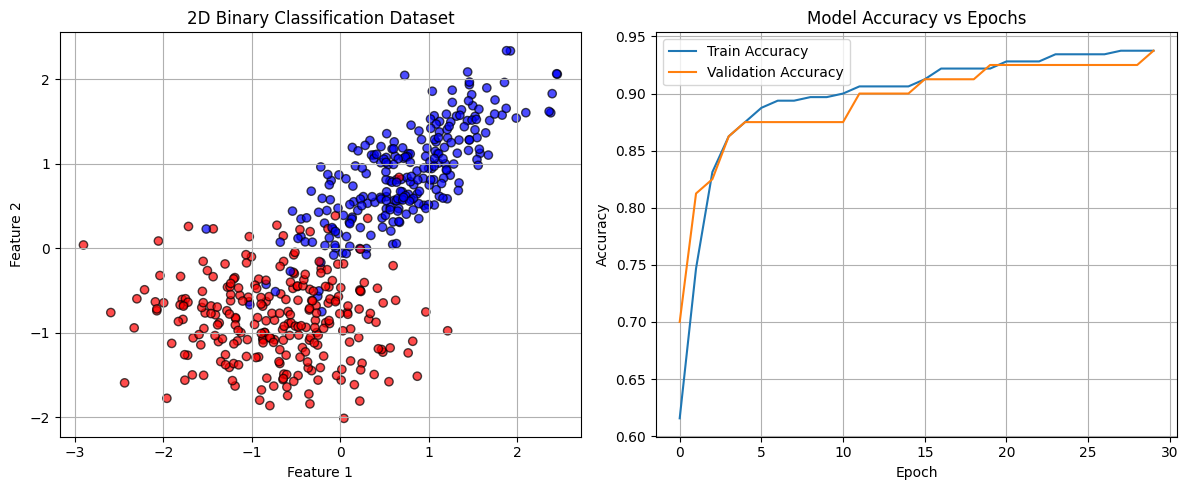

In [10]:
# 7. Plot the dataset
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='bwr', edgecolors='k', alpha=0.7)
plt.title("2D Binary Classification Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)

# 8. Plot accuracy over epochs
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

In [12]:
# 1. Generate dataset
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, random_state=123)

# 2. Scale and split (train and test)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=123)

# 3. Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32)

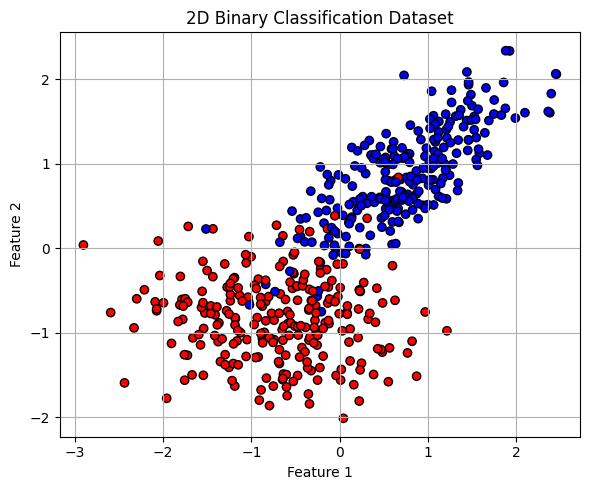

In [13]:
# 4. Visualize dataset
plt.figure(figsize=(6, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.title("2D Binary Classification Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
# 5. Define the model
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 10)
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

In [15]:
model = SimpleNN(input_dim=2)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [16]:
# 6. Train the model
num_epochs = 30
train_accuracies = []
test_accuracies = []
losses = []

for epoch in range(num_epochs):
    model.train()

    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        # Training accuracy
        train_preds = (outputs >= 0.5).float()
        train_acc = accuracy_score(y_train_tensor.numpy(), train_preds.numpy())

        # Test accuracy
        test_outputs = model(X_test_tensor)
        test_preds = (test_outputs >= 0.5).float()
        test_acc = accuracy_score(y_test_tensor.numpy(), test_preds.numpy())

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    losses.append(loss.item())

    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {loss.item():.4f} - Train Acc: {train_acc:.4f} - Test Acc: {test_acc:.4f}")


Epoch 1/30 - Loss: 0.6957 - Train Acc: 0.4350 - Test Acc: 0.5400
Epoch 2/30 - Loss: 0.6683 - Train Acc: 0.5625 - Test Acc: 0.7800
Epoch 3/30 - Loss: 0.6419 - Train Acc: 0.7375 - Test Acc: 0.8200
Epoch 4/30 - Loss: 0.6166 - Train Acc: 0.8500 - Test Acc: 0.8600
Epoch 5/30 - Loss: 0.5924 - Train Acc: 0.8925 - Test Acc: 0.8900
Epoch 6/30 - Loss: 0.5692 - Train Acc: 0.9275 - Test Acc: 0.9000
Epoch 7/30 - Loss: 0.5472 - Train Acc: 0.9375 - Test Acc: 0.9300
Epoch 8/30 - Loss: 0.5262 - Train Acc: 0.9525 - Test Acc: 0.9300
Epoch 9/30 - Loss: 0.5062 - Train Acc: 0.9550 - Test Acc: 0.9300
Epoch 10/30 - Loss: 0.4870 - Train Acc: 0.9525 - Test Acc: 0.9300
Epoch 11/30 - Loss: 0.4687 - Train Acc: 0.9625 - Test Acc: 0.9300
Epoch 12/30 - Loss: 0.4512 - Train Acc: 0.9575 - Test Acc: 0.9400
Epoch 13/30 - Loss: 0.4346 - Train Acc: 0.9550 - Test Acc: 0.9400
Epoch 14/30 - Loss: 0.4187 - Train Acc: 0.9500 - Test Acc: 0.9300
Epoch 15/30 - Loss: 0.4036 - Train Acc: 0.9500 - Test Acc: 0.9300
Epoch 16/30 - Loss:

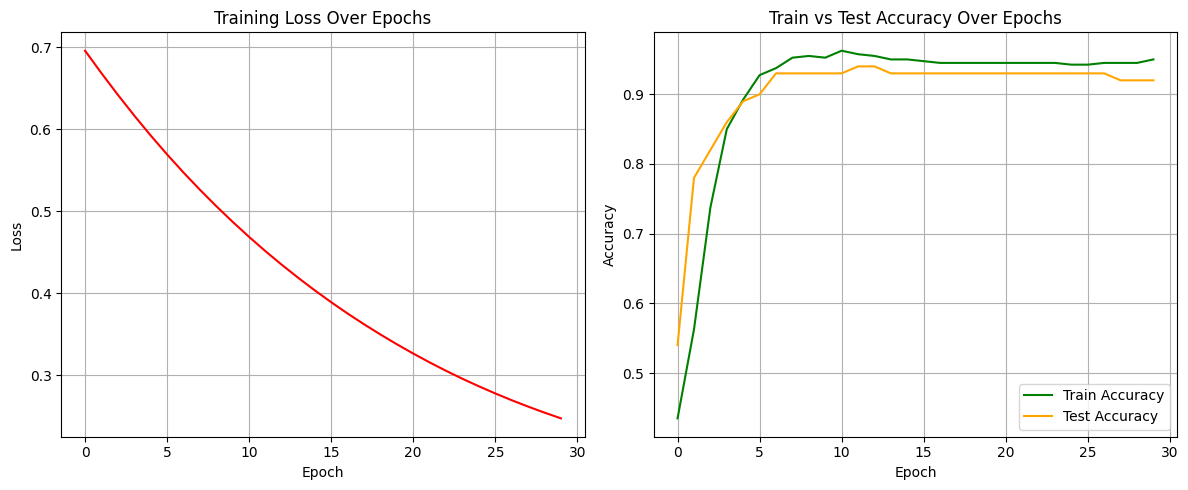

In [17]:
# 7. Plot loss and combined accuracy
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(losses, label="Loss", color='red')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

# Combined Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Train Accuracy", color='green')
plt.plot(test_accuracies, label="Test Accuracy", color='orange')
plt.title("Train vs Test Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()